# Version: V2 (Weighted Spa-Specific Model)

In [29]:
print("Hello F1")

Hello F1


In [30]:
# F1 Belgian GP 2023 Prediction Model (V1)
# Step 1: Load required libraries

import pandas as pd

# -----------------------------
# Step 2: Create base dataset
# -----------------------------

# Each row represents one driver
# Rank rule: 1 = best, higher = worse

data = {
    "Driver": [
        "Verstappen", "Perez",
        "Hamilton", "Russell",
        "Leclerc","Sainz",
        "Norris", "Piastri",
        "Alonso", "Stroll",
        "Ocon", "Gasly",
        "Albon", "Sargeant",
        "Bottas","Zhou",
        "Magnussen", "Hulkenberg",
        "Tsunoda", "De Vries"
    ],

    # Qualifying rank at Spa 2023 (approximate / placeholder)
    "Quali_Rank":   [2, 3,
                    4, 8,
                    1, 5,
                    7, 6,
                    9, 10,
                    11, 12,
                    13, 20,
                    14, 15,
                    18, 17,
                    16, 19],

    # FP2 long run pace rank (race trim)
    "FP2_Rank": [   3, 6,
                    7, 8,
                    5, 9,
                    2, 4,
                    10, 14,
                    11, 12,
                    13, 20,
                    15, 16,
                    18, 17,
                    19, 1],

    # Spa historical performance rank
   "Spa_History_Rank": [
    1, 3,      # Verstappen, Perez
    2, 5,      # Hamilton, Russell
    4, 6,      # Leclerc, Sainz
    7, 9,      # Norris, Piastri
    8, 14,     # Alonso, Stroll
    11, 12,    # Ocon, Gasly
    10, 20,    # Albon, Sargeant
    13, 15,    # Bottas, Zhou
    18, 17,    # Magnussen, Hulkenberg
    16, 19     # Tsunoda, De Vries
],

    # Team form rank (2023 season)
   "Team_Form_Rank" : [
    1, 1,      # Red Bull
    3, 3,      # Mercedes
    2, 2,      # Ferrari
    4, 4,      # McLaren
    5, 5,      # Aston Martin
    6, 6,      # Alpine
    7, 7,      # Williams
    8, 8,      # Alfa Romeo
    9, 9,      # Haas
    10, 10     # AlphaTauri
]
}

# Create DataFrame

df = pd.DataFrame(data)

# -----------------------------
# Step 3: Calculate Total Score
# -----------------------------

df["Total_Score"] = (
    0.35 * df["FP2_Rank"]
    + 0.25 * df["Quali_Rank"]
    + 0.20 * df["Team_Form_Rank"]
    + 0.20 * df["Spa_History_Rank"]
)

# -----------------------------
# Step 4: Convert to Strength Score
# -----------------------------

max_score = df["Total_Score"].max()

df["Strength_Score"] = (max_score + 1) - df["Total_Score"]

# -----------------------------
# Step 5: Calculate probabilities
# -----------------------------

total_strength = df["Strength_Score"].sum()

df["Win_Probability"] = df["Strength_Score"] / total_strength

df["Podium_Probability"] = (df["Win_Probability"] * 1.5).clip(upper=1.0)

# -----------------------------
# Step 6: Sort results
# -----------------------------

df = df.sort_values(by="Win_Probability", ascending=False)

# Display final table
print(df[["Driver", "Win_Probability", "Podium_Probability"]])

df["Win_Probability"] = df["Win_Probability"] * 100
df["Podium_Probability"] = df["Podium_Probability"] * 100

df


        Driver  Win_Probability  Podium_Probability
0   Verstappen         0.092416            0.138624
4      Leclerc         0.085393            0.128090
1        Perez         0.082865            0.124298
2     Hamilton         0.078371            0.117556
6       Norris         0.077247            0.115871
7      Piastri         0.072472            0.108708
5        Sainz         0.069663            0.104494
3      Russell         0.067416            0.101124
8       Alonso         0.056461            0.084691
10        Ocon         0.047191            0.070787
11       Gasly         0.042697            0.064045
19    De Vries         0.042135            0.063202
9       Stroll         0.040449            0.060674
12       Albon         0.040449            0.060674
14      Bottas         0.030618            0.045927
15        Zhou         0.025000            0.037500
17  Hulkenberg         0.016854            0.025281
18     Tsunoda         0.014326            0.021489
16   Magnuss

,Driver,Quali_Rank,FP2_Rank,Spa_History_Rank,Team_Form_Rank,Total_Score,Strength_Score,Win_Probability,Podium_Probability
0,Verstappen,2,3,1,1,1.95,16.45,9.241573,13.862360
4,Leclerc,1,5,4,2,3.20,15.20,8.539326,12.808989
1,Perez,3,6,3,1,3.65,14.75,8.286517,12.429775
2,Hamilton,4,7,2,3,4.45,13.95,7.837079,11.755618
6,Norris,7,2,7,4,4.65,13.75,7.724719,11.587079
7,Piastri,6,4,9,4,5.50,12.90,7.247191,10.870787
5,Sainz,5,9,6,2,6.00,12.40,6.966292,10.449438
3,Russell,8,8,5,3,6.40,12.00,6.741573,10.112360
8,Alonso,9,10,8,5,8.35,10.05,5.646067,8.469101
10,Ocon,11,11,11,6,10.00,8.40,4.719101,7.078652


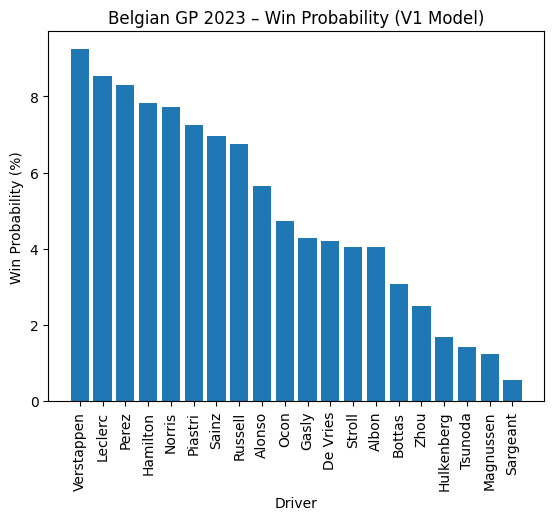

In [31]:
import matplotlib.pyplot as plt
# Bar chart of win probabilities
plt.figure()
plt.bar(df["Driver"], df["Win_Probability"])
plt.xticks(rotation=90)
plt.title("Belgian GP 2023 – Win Probability (V1 Model)")
plt.xlabel("Driver")
plt.ylabel("Win Probability (%)")
plt.show()

In [32]:
df[["Driver", "Win_Probability", "Podium_Probability"]].head(5).round(2)


,Driver,Win_Probability,Podium_Probability
0,Verstappen,9.24,13.86
4,Leclerc,8.54,12.81
1,Perez,8.29,12.43
2,Hamilton,7.84,11.76
6,Norris,7.72,11.59


In [34]:
df[["Driver", "Win_Probability", "Podium_Probability"]] \
    .round(2) \
    .to_csv("spa_2023_predictions_v2.csv", index=False)